In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="vansh@11singH",
    database="demo2_msql_english")

cur = db.cursor()

In [37]:
query = """select * from demo2_msql_english.business_id"""

cur.execute(query)

data = cur.fetchall()

business_id = pd.DataFrame(data, columns = [['business_id', 'name',	'address',	'city',	'state', 'postal_code',	'latitude',	'longitude', 'stars',	
                                    'review_count', 'is_open',	'attributes','categories',	'hours']])
business_id.head(2)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.9555,-75.1556,4.0,80,1,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.2696,-87.0589,2.0,6,1,"{""BusinessParking"": ""None"", ""BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""6:0-22:0"", ""..."


In [5]:
business_id.columns = [col if isinstance(col, str) else col[0] for col in business_id.columns]

# Convert lists/dicts in columns to strings (especially for 'attributes' and 'categories')
for col in ['attributes', 'categories', 'hours']:
    if col in business_id.columns:
        business_id[col] = business_id[col].apply(lambda x: str(x) if isinstance(x, (dict, list)) else x)

# Fill NaN values with blanks or NA if preferred
business_id = business_id.fillna('')

# Remove leading/trailing whitespace in all string/object columns
for col in business_id.select_dtypes(['object']):
    business_id[col] = business_id[col].str.strip()

# Export to CSV (without index column) for Tableau
business_id.to_csv('business_id_clean.csv', index=False, encoding='utf-8')

In [6]:
query = """SELECT name, sum(review_count) as Total_Review, avg(stars) as Average_Rating 
FROM demo2_msql_english.business_id group by name order by Total_Review desc limit 10"""

cur.execute(query)

data = cur.fetchall()

Top_Restaurant_by_Review = pd.DataFrame(data, columns = [['Restaurant', 'Total Review', 'Average_Rating']])
Top_Restaurant_by_Review

,Restaurant,Total Review,Average_Rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7711,3.369427
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5754,2.500000


In [7]:
query = """SELECT name, sum(review_count) as Total_Review, avg(stars) as Average_Rating 
FROM demo2_msql_english.business_id group by name order by Average_Rating desc limit 10"""

cur.execute(query)

data = cur.fetchall()

Top_Restaurant_by_Rating = pd.DataFrame(data, columns = [['Restaurant', 'Total Review', 'Average_Rating']])
Top_Restaurant_by_Rating

,Restaurant,Total Review,Average_Rating
0,Volpi Foods,40,5.0
1,Constant Smoke BBQ,65,5.0
2,Vanessa Cafe Restaraunt Pizzeria,15,5.0
3,Enchanted Cat Cafe,8,5.0
4,Taqueria Don Quezadillas Belinda,14,5.0
5,Julis Mexican Restaurant,13,5.0
6,Jet City Espresso Hyde Park,152,5.0
7,Cheers Cafe,6,5.0
8,My Crazy Uncle Seafood,12,5.0
9,Jiffy Food Stores,14,5.0


In [8]:
query = """SET @rowindex := -1;"""
query = """SELECT min(review_count) as mini_review, max(review_count) as max_review, avg(review_count) as avg_reiew,

(SELECT ROUND(AVG(review_count), 0)
FROM
(
    SELECT @rowindex:=@rowindex + 1 AS rowindex,
           review_count
    FROM demo2_msql_english.business_id
    ORDER BY review_count
) AS N
WHERE N.rowindex IN (FLOOR(@rowindex / 2), CEIL(@rowindex / 2))) as median,

 min(stars) as mini_rating, max(stars) as max_rating, avg(stars) as avg_rating
FROM demo2_msql_english.business_id
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6
0,5,248,55.9754,None,1.0,5.0,3.477281


In [9]:
query = """SELECT *
FROM demo2_msql_english.checkin 
where Column1 in (SELECT business_id FROM demo2_msql_english.business_id)
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Business_id', 'checkin_date'])
df

,Business_id,checkin_date
0,-cE9GrThz6HHn2zdpoqY_w,2010-02-01 00:27:53
1,-cE9GrThz6HHn2zdpoqY_w,2010-02-07 15:12:27
2,-cE9GrThz6HHn2zdpoqY_w,2010-07-10 15:45:44
3,-cE9GrThz6HHn2zdpoqY_w,2010-08-28 22:40:46
4,-cE9GrThz6HHn2zdpoqY_w,2010-12-05 19:07:38
...,...,...
3103453,zznJox6-nmXlGYNWgTDwQQ,2017-05-27 22:08:39
3103454,zznJox6-nmXlGYNWgTDwQQ,2019-08-18 20:15:58
3103455,zznJox6-nmXlGYNWgTDwQQ,2019-09-12 10:49:25
3103456,zznJox6-nmXlGYNWgTDwQQ,2021-02-13 14:50:06


In [10]:
query = """SELECT Column1, count(*)
FROM demo2_msql_english.checkin 
where Column1 in (SELECT business_id FROM demo2_msql_english.business_id)
group by Column1 order by count(*) asc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Business_id', 'checkin_date'])
df

,Business_id,checkin_date
0,vZE7TmYnTvLZCilvTJFIzA,1
1,w0r9F-1XsPwQd4-hDEAg-g,1
2,xI1Zo3LNYKEnDnK4aFWFPA,1
3,yT4l7HVC-8tepyFv27qD6w,1
4,zznZqH9CiAznbkV6fXyHWA,1
...,...,...
31059,E359ITHKa9CVe9cTOofZUQ,2539
31060,dzAo5l1AAHnz8Ln5uim-ZQ,2574
31061,SyKHFYhRzW1hlwDga5EWWw,3392
31062,ODnBnY1yRXwhuWAWydVsCA,4302


# Do restaurents with higher engagement tend to have hgher ratings?

In [11]:
query = """with cte as
(SELECT business_id, stars, review_count 
FROM demo2_msql_english.business_id),
cte1 as
(SELECT 
    business_id,
    SUM(LENGTH(`checkin_date`) - LENGTH(REPLACE(`checkin_date`, ', ', '')) + 1) AS Total_checkin
FROM new_checkin
GROUP BY business_id
ORDER BY Total_checkin ASC),
cte2 as
(SELECT business_id, count(*) as tip_cnt
FROM demo2_msql_english.tip group by business_id),
cte3 as
(select c.business_id,
avg(c.stars) as rating,
sum(c.review_count) as review,
sum(c1.Total_checkin) as checkin,
sum(tip_cnt) as tip
from cte c left join cte1 c1
on c.business_id = c1.business_id
left join cte2 c2
on c2.business_id = c.business_id
group by c.business_id)

select rating, round(avg(review),0) as review, round(avg(checkin),0) as chekin, round(avg(tip),0) as tip
from cte3 group by rating order by rating"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['rating', 'review', 'checkin', 'tip'])
df

,rating,review,checkin,tip
0,1.0,14,34,3
1,1.5,24,68,4
2,2.0,28,104,5
3,2.5,37,158,6
4,3.0,48,211,8
5,3.5,64,251,10
6,4.0,73,253,11
7,4.5,65,171,9
8,5.0,31,54,4


# Is there a correlation between reviews numbers and checkins?

In [12]:
query = """with cte as
(SELECT business_id, stars, review_count,
case when stars >= 3.5 then 'High Rated' else 'Low Rated' end as category
FROM demo2_msql_english.business_id),
cte1 as
(SELECT 
    business_id,
    SUM(LENGTH(`checkin_date`) - LENGTH(REPLACE(`checkin_date`, ', ', '')) + 1) AS Total_checkin
FROM new_checkin
GROUP BY business_id
ORDER BY Total_checkin ASC),
cte2 as
(SELECT business_id, count(*) as tip_cnt
FROM demo2_msql_english.tip group by business_id),
cte3 as
(select c.business_id, c.category,
avg(c.stars) as rating,
sum(c.review_count) as review,
sum(c1.Total_checkin) as checkin,
sum(tip_cnt) as tip
from cte c left join cte1 c1
on c.business_id = c1.business_id
left join cte2 c2
on c2.business_id = c.business_id
group by c.business_id, c.category order by review asc)


select * from cte3"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['business_id', 'category', 'rating', 'review', 'checkin', 'tip'])
df.dropna()

,business_id,category,rating,review,checkin,tip
2,67FYIjs8KARCkMDgiDVDDw,Low Rated,3.0,5,43,1
8,_8QkK3WwGxNnn54Q1VTTcA,High Rated,5.0,5,43,1
10,kei6KHKxuNF1nlm7akQA-Q,High Rated,4.0,5,39,1
15,XqGNxBmAo2Jm5DibhJcrOQ,High Rated,3.5,5,53,1
22,5wo7nNHOvfzt2c-PG0BUKQ,Low Rated,3.0,5,63,2
...,...,...,...,...,...,...
31532,MTB9CelShC-x4jj31BJYAg,High Rated,3.5,248,779,16
31533,s3ZR7G5l-YN5fqms8vRSRw,High Rated,4.0,248,1531,49
31534,9iSoPNBV54dj6L0rxO4RWw,High Rated,3.5,248,437,7
31535,30OhTA38fp8xuqW4O2D6Eg,High Rated,4.0,248,591,14


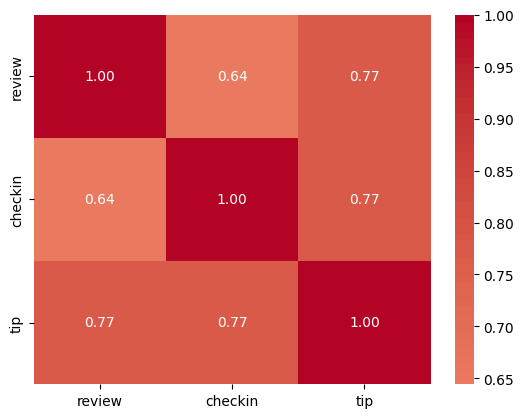

In [13]:
corr_matrix = df[['review', 'checkin', 'tip']].corr(method="pearson")

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.show()

# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?

In [14]:
user_engagment = df.groupby('category')[['review', 'checkin', 'tip']].mean()
user_engagment

,review,checkin,tip
category,,,
High Rated,65.785335,221.151141,10.113025
Low Rated,37.726646,157.0,6.506592


# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?

In [15]:
query = """with cte as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as review_count
FROM demo2_msql_english.reviews r join demo2_msql_english.business_id b
on r.business_id = b.business_id and r.stars >= 3.5
group by date order by date),
cte1 as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as tip_count
FROM demo2_msql_english.tip t join demo2_msql_english.business_id b
on t.business_id = b.business_id and b.stars >= 3.5
group by date order by date)

select c.date, c.review_count, c1.tip_count
from cte c join cte1 c1
on c.date = c1.date"""

cur.execute(query)

data = cur.fetchall()

higher_rating = pd.DataFrame(data, columns = ['Date', 'Review_count', 'Tip_count'])
higher_rating

,Date,Review_count,Tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [16]:
query = """with cte as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as review_count
FROM demo2_msql_english.reviews r join demo2_msql_english.business_id b
on r.business_id = b.business_id and r.stars < 3.5
group by date order by date),
cte1 as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as tip_count
FROM demo2_msql_english.tip t join demo2_msql_english.business_id b
on t.business_id = b.business_id and b.stars < 3.5
group by date order by date)

select c.date, c.review_count, c1.tip_count
from cte c join cte1 c1
on c.date = c1.date"""

cur.execute(query)

data = cur.fetchall()

lower_rating = pd.DataFrame(data, columns = ['Date', 'Review_count', 'Tip_count'])
lower_rating

,Date,Review_count,Tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [27]:
query = """with high_reveiw as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as review_count
FROM demo2_msql_english.reviews r join demo2_msql_english.business_id b
on r.business_id = b.business_id and r.stars >= 3.5
group by date order by date),
high_reveiw1 as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as tip_count
FROM demo2_msql_english.tip t join demo2_msql_english.business_id b
on t.business_id = b.business_id and b.stars >= 3.5
group by date order by date),
high_tip as
(select c.date, c.review_count, c1.tip_count
from high_reveiw c join high_reveiw1 c1
on c.date = c1.date),
low_review as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as review_count
FROM demo2_msql_english.reviews r join demo2_msql_english.business_id b
on r.business_id = b.business_id and r.stars < 3.5
group by date order by date),
low_review1 as
(SELECT date_format(checkin_date, '%m-%Y') as date, count(*) as tip_count
FROM demo2_msql_english.tip t join demo2_msql_english.business_id b
on t.business_id = b.business_id and b.stars < 3.5
group by date order by date),
low_tip as
(select r.date, r.review_count, r1.tip_count
from low_review r join low_review1 r1
on r.date = r1.date)

select h.date, h.review_count as high_review, l.review_count as low_review
from high_tip h join low_tip l
on h.date = l.date"""

cur.execute(query)

data = cur.fetchall()

high_low_review = pd.DataFrame(data, columns = ['Date', 'High Review', 'Low_Review'])

high_low_review

,Date,High Review,Low_Review
0,01-2010,1218,613
1,01-2011,2171,1103
2,01-2012,3086,1748
3,01-2013,3801,2196
4,01-2014,4973,2769
...,...,...,...
149,12-2017,10161,5970
150,12-2018,12870,7574
151,12-2019,13756,7591
152,12-2020,11294,5014


In [18]:
query = """SELECT date_format(checkin_date, '%m-%Y') as Month_Year, avg(stars) as average_rating
FROM demo2_msql_english.reviews
group by Month_Year order by Month_Year"""

cur.execute(query)

data = cur.fetchall()

time_average_rating = pd.DataFrame(data, columns = ['Month_Year', 'average_rating'])
time_average_rating

,Month_Year,average_rating
0,01-2006,4.0000
1,01-2007,3.8974
2,01-2008,3.6040
3,01-2009,3.6907
4,01-2010,3.7242
...,...,...
198,12-2017,3.6134
199,12-2018,3.6087
200,12-2019,3.6652
201,12-2020,3.8337


In [19]:
time_average_rating.to_csv("time_average_rating.csv", index=False, encoding="utf-8")

In [20]:
time_average_rating['Month_Year'] = pd.to_datetime(time_average_rating['Month_Year'], format='%m-%Y')
time_average_rating['average_rating'] = time_average_rating['average_rating'].astype('float64')
time_average_rating.sort_values('Month_Year', ascending = True)
time_average_rating = time_average_rating[time_average_rating['Month_Year'] > '2017']
time_average_rating.head(2)

,Month_Year,average_rating
12,2018-01-01,3.7067
13,2019-01-01,3.7193


In [21]:
higher_rating['Date'] = pd.to_datetime(higher_rating['Date'], format='%m-%Y')
higher_rating.sort_values('Date', ascending = True)
higher_rating = higher_rating[higher_rating['Date']> '2017']


In [22]:
lower_rating['Date'] = pd.to_datetime(higher_rating['Date'], format='%m-%Y')
lower_rating.sort_values('Date', ascending = True)
lower_rating = lower_rating[lower_rating['Date']> '2017']
lower_rating.head(2)

,Date,Review_count,Tip_count
8,2018-01-01,6328,380
9,2019-01-01,7469,315


In [23]:
high_tip = higher_rating.groupby('Date')['Tip_count'].sum()
low_tip = lower_rating.groupby('Date')['Tip_count'].sum()

high_review = higher_rating.groupby('Date')['Review_count'].sum()
low_review = lower_rating.groupby('Date')['Review_count'].sum()

time_average_mean = time_average_rating.groupby('Month_Year')['average_rating'].mean()

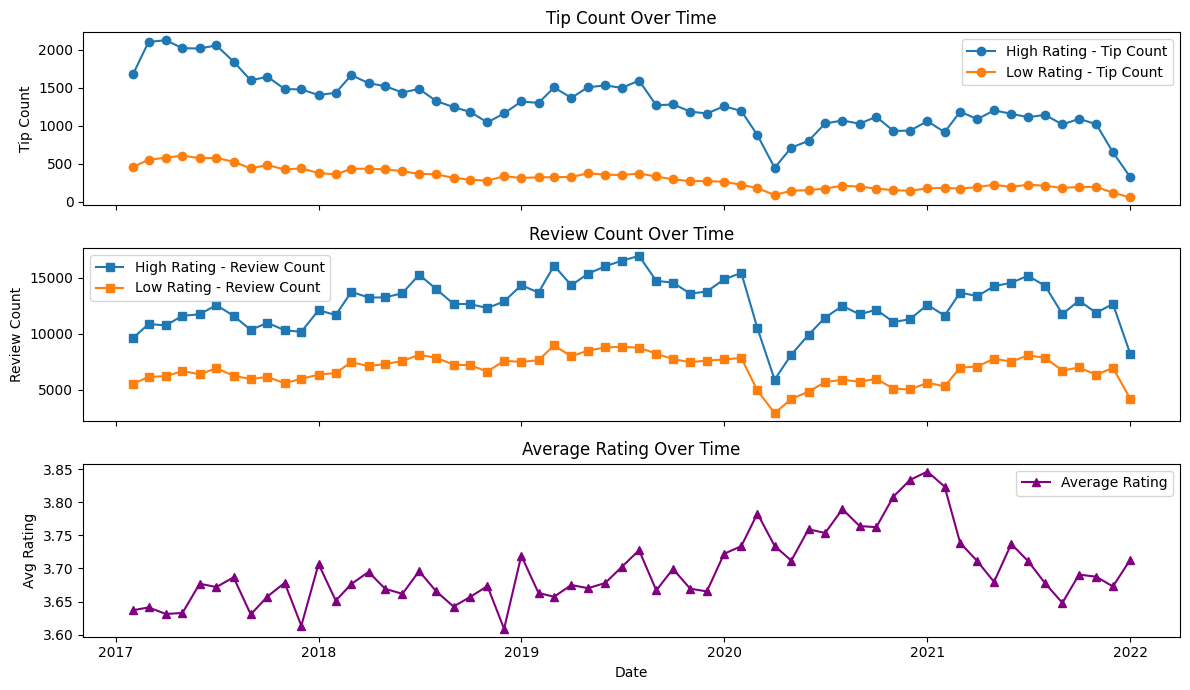

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)

# 1️⃣ Plot Tip Counts
axes[0].plot(high_tip.index, high_tip.values, label="High Rating - Tip Count", marker="o")
axes[0].plot(low_tip.index, low_tip.values, label="Low Rating - Tip Count", marker="o")
axes[0].set_title("Tip Count Over Time")
axes[0].set_ylabel("Tip Count")
axes[0].legend()

# 2️⃣ Plot Review Counts
axes[1].plot(high_review.index, high_review.values, label="High Rating - Review Count", marker="s")
axes[1].plot(low_review.index, low_review.values, label="Low Rating - Review Count", marker="s")
axes[1].set_title("Review Count Over Time")
axes[1].set_ylabel("Review Count")
axes[1].legend()

# 3️⃣ Plot Average Rating
axes[2].plot(time_average_mean.index, time_average_mean.values, label="Average Rating", color="purple", marker="^")
axes[2].set_title("Average Rating Over Time")
axes[2].set_ylabel("Avg Rating")
axes[2].set_xlabel("Date")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Is there any difference in engagement elit user and non elit user?

In [25]:
query = """select category, count(*) as Class_cnt, sum(review_count) as Total_review from 
(SELECT *,
case when elite is null then 'Not Elite' else 'Elite' end as category 
FROM demo2_msql_english.user) as a
group by category"""

cur.execute(query)

data = cur.fetchall()

Elite = pd.DataFrame(data, columns = ['Class', 'Elite Count', 'Total Review'])
Elite.head(2)

,Class,Elite Count,Total Review
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


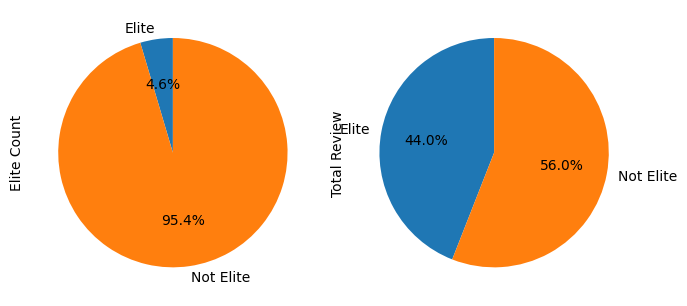

In [26]:
data = {
    "Class": ["Elite", "Not Elite"],
    "Elite Count": [91198, 1896699],
    "Total Review": [20484441, 26021235]
}
df = pd.DataFrame(data).set_index("Class")

# Two pie charts side by side
axes = df.plot.pie(
    subplots=True,
    autopct="%1.1f%%",
    figsize=(7,5),   # <-- set size here
    startangle=90,
    legend=False
)

plt.tight_layout()
plt.show()

# Busiest Hours

In [40]:
from datetime import datetime

query = """SELECT * FROM demo2_msql_english.new_checkin"""

cur.execute(query)

data = cur.fetchall()

chekin_hour = pd.DataFrame(data, columns = ['Business_id', 'Checkin_date'])
checkin_engagement = []

for i in chekin_hour['Checkin_date']:
    checkin_engagement.extend([
        datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H")
        for j in i.split(',')
    ])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[0].count()
checkin_engagement

0
0     286856
1     217994
2     143484
3      88326
4      51467
5      30465
6      17535
7      11078
8       7004
9       6209
10     12210
11     25768
12     47071
13     68059
14     87997
15    131986
16    221195
17    259187
18    238766
19    205320
20    180634
21    199833
22    259934
23    305080
Name: 0, dtype: int64

In [43]:
query = """SELECT hour(checkin_date) as hours, count(*) as review_count 
FROM demo2_msql_english.reviews group by hours order by hours"""

cur.execute(query)

data = cur.fetchall()

Review_Engagement = pd.DataFrame(data, columns = ['Hours', 'Rewview_count'])
Review_Engagement

,Hours,Rewview_count
0,0,137991
1,1,134466
2,2,116041
3,3,89608
4,4,62366
5,5,39618
6,6,24310
7,7,14655
8,8,9661
9,9,7910


In [45]:
query = """SELECT hour(checkin_date) as hours, count(*) as tip_count 
FROM demo2_msql_english.tip group by hours order by hours"""

cur.execute(query)

data = cur.fetchall()

Tip_Engagement = pd.DataFrame(data, columns = ['Hours', 'Tip_count'])
Tip_Engagement

,Hours,Tip_count
0,0,21535
1,1,18808
2,2,14562
3,3,10319
4,4,6851
5,5,4193
6,6,2747
7,7,1754
8,8,1195
9,9,930


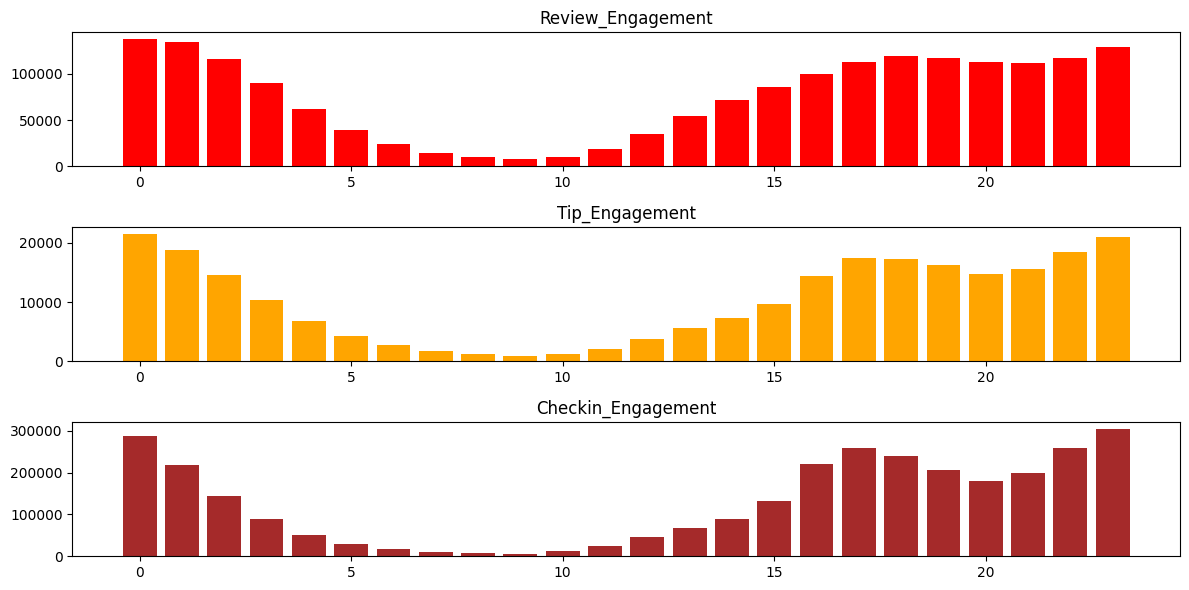

In [50]:
plt.figure(figsize = (12, 6))
plt.subplot(3,1,1)
plt.title('Review_Engagement')
plt.bar(Review_Engagement['Hours'], Review_Engagement['Rewview_count'], color = 'red')
plt.subplot(3,1,2)
plt.title('Tip_Engagement')
plt.bar(Tip_Engagement['Hours'], Tip_Engagement['Tip_count'], color = 'orange')
plt.subplot(3,1,3)
plt.title('Checkin_Engagement')
plt.bar(checkin_engagement.index, checkin_engagement.values, color = 'brown')
plt.tight_layout()
plt.show()